In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

In [9]:
import seaborn as sns

In [21]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [22]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [47]:
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold

In [23]:
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (3, 3)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df = pd.read_csv('bank-additional/bank-additional/bank-additional-full.csv', sep= ';')
num_col = len(list(df.columns))
pd.set_option('display.max_columns', num_col * 3)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [4]:
df.groupby('y').mean().T

y,no,yes
age,39.911185,40.913147
duration,220.844807,553.191164
campaign,2.633085,2.051724
pdays,984.113878,792.035560
previous,0.132374,0.492672
emp.var.rate,0.248875,-1.233448
cons.price.idx,93.603757,93.354386
cons.conf.idx,-40.593097,-39.789784
euribor3m,3.811491,2.123135
nr.employed,5176.166600,5095.115991


In [5]:
df.groupby('job').mean().T

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
age,38.187296,39.555760,41.723214,45.500000,42.362859,62.027326,39.949331,37.926430,25.894857,38.507638,39.733728,45.563636
duration,254.312128,264.542360,263.267857,250.454717,257.058140,273.712209,264.142153,258.398085,283.683429,250.232241,249.451677,239.675758
campaign,2.623489,2.558461,2.535714,2.639623,2.476060,2.476744,2.660802,2.587805,2.104000,2.577339,2.564103,2.648485
pdays,954.319229,985.160363,981.267170,960.579245,962.647059,897.936047,976.621393,979.974049,840.217143,964.408127,935.316568,938.727273
previous,0.189023,0.122542,0.138736,0.137736,0.185021,0.327326,0.143561,0.154951,0.524571,0.153789,0.199211,0.154545
emp.var.rate,0.015563,0.248995,0.158723,0.433396,-0.012688,-0.698314,0.094159,0.175359,-1.408000,0.274566,-0.111736,0.357879
cons.price.idx,93.534054,93.656656,93.605372,93.676576,93.522755,93.430786,93.559982,93.634659,93.331613,93.561471,93.563781,93.718942
cons.conf.idx,-40.245433,-41.375816,-41.283654,-39.495283,-40.489466,-38.573081,-40.488107,-41.290048,-40.187543,-39.927569,-40.007594,-38.797879
euribor3m,3.550274,3.771996,3.791120,4.009645,3.611316,2.770066,3.689376,3.699187,1.884224,3.820401,3.466583,3.949033
nr.employed,5164.125350,5175.615150,5176.313530,5179.529623,5166.650513,5122.262151,5170.674384,5171.600126,5085.939086,5175.648391,5157.156509,5172.931818


In [6]:
df.groupby('marital').mean().T

marital,divorced,married,single,unknown
age,44.899393,42.307165,33.158714,40.275000
duration,253.790330,257.438623,261.524378,312.725000
campaign,2.613400,2.572810,2.533800,3.187500
pdays,968.639853,967.247673,949.909578,937.100000
previous,0.168690,0.155608,0.211359,0.275000
emp.var.rate,0.163985,0.183625,-0.167989,-0.221250
cons.price.idx,93.606563,93.597367,93.517300,93.471250
cons.conf.idx,-40.707069,-40.270659,-40.918698,-40.820000
euribor3m,3.715603,3.745832,3.317447,3.313037
nr.employed,5170.878643,5171.848772,5155.199265,5157.393750


In [7]:
df.groupby('education').mean().T

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
age,47.596504,40.448953,39.061208,37.998213,48.500000,40.080107,38.879191,43.481225
duration,264.827826,264.414485,261.291811,260.886810,276.777778,252.533855,253.223373,262.390526
campaign,2.600575,2.556283,2.532341,2.568576,2.277778,2.586115,2.563527,2.596187
pdays,965.704981,980.368237,979.133168,964.358382,943.833333,960.765974,951.807692,942.830734
previous,0.147031,0.129145,0.141439,0.185917,0.111111,0.163075,0.192390,0.226459
emp.var.rate,0.215924,0.231152,0.159239,0.032937,-0.133333,0.173012,-0.028090,0.059099
cons.price.idx,93.658309,93.650062,93.623399,93.584857,93.317333,93.569864,93.493466,93.658615
cons.conf.idx,-40.239871,-41.127880,-41.326749,-40.940641,-39.950000,-40.124108,-39.975805,-39.877816
euribor3m,3.751768,3.772942,3.697963,3.556157,3.516556,3.710457,3.529663,3.571098
nr.employed,5170.124880,5174.718063,5172.294012,5164.994735,5171.777778,5170.155979,5163.226298,5159.549509


Ratio of classes (no : yes) 0.8873458288821987 : 0.11265417111780131


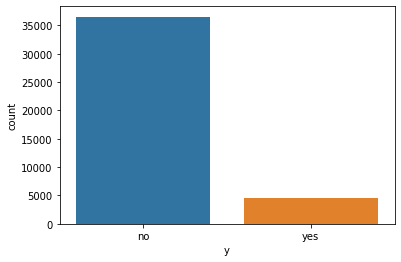

In [10]:
ratio = df.y[df.y == "yes"].count() / df.y.shape[0]
print('Ratio of classes (no : yes)', 1- ratio, ':', ratio)
sns.countplot(df.y)
plt.show()

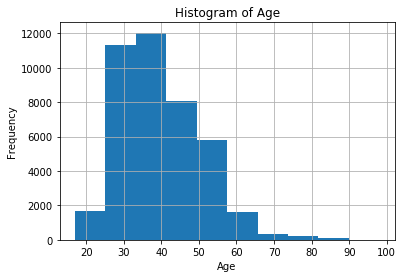

In [11]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

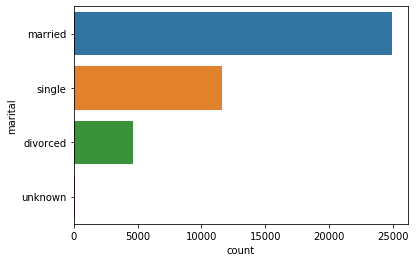

In [12]:
sns.countplot(y = df.marital, data = df)
plt.show()

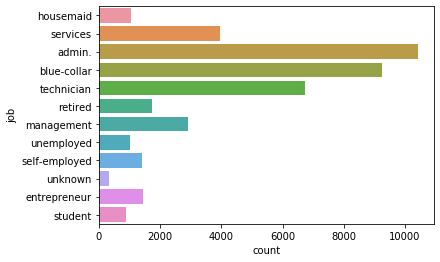

In [13]:
sns.countplot(y = df.job, data = df)
plt.show()

In [20]:
print('check 1: ', df.groupby(['loan','y']).size())
print('\n\ncheck 2: ', df.groupby(['job','y']).size())
print('\n\ncheck 3: ', df.groupby(['marital','y']).size())
print('\n\ncheck 4: ', df.groupby(['education','y']).size())
print('\n\ncheck 5: ', df.groupby(['poutcome','y']).size())
print('\n\ncheck 6: ', df.groupby(['month','y']).size())
print('\n\ncheck 7: ', df.groupby(['y', 'default']).size())

check 1:  loan     y  
no       no     30100
         yes     3850
unknown  no       883
         yes      107
yes      no      5565
         yes      683
dtype: int64


check 2:  job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
dtype: int64


check 3:  marital   y  
divorced  no      4136
          yes      476
married   no     22396
          yes     2532
single    no      9948

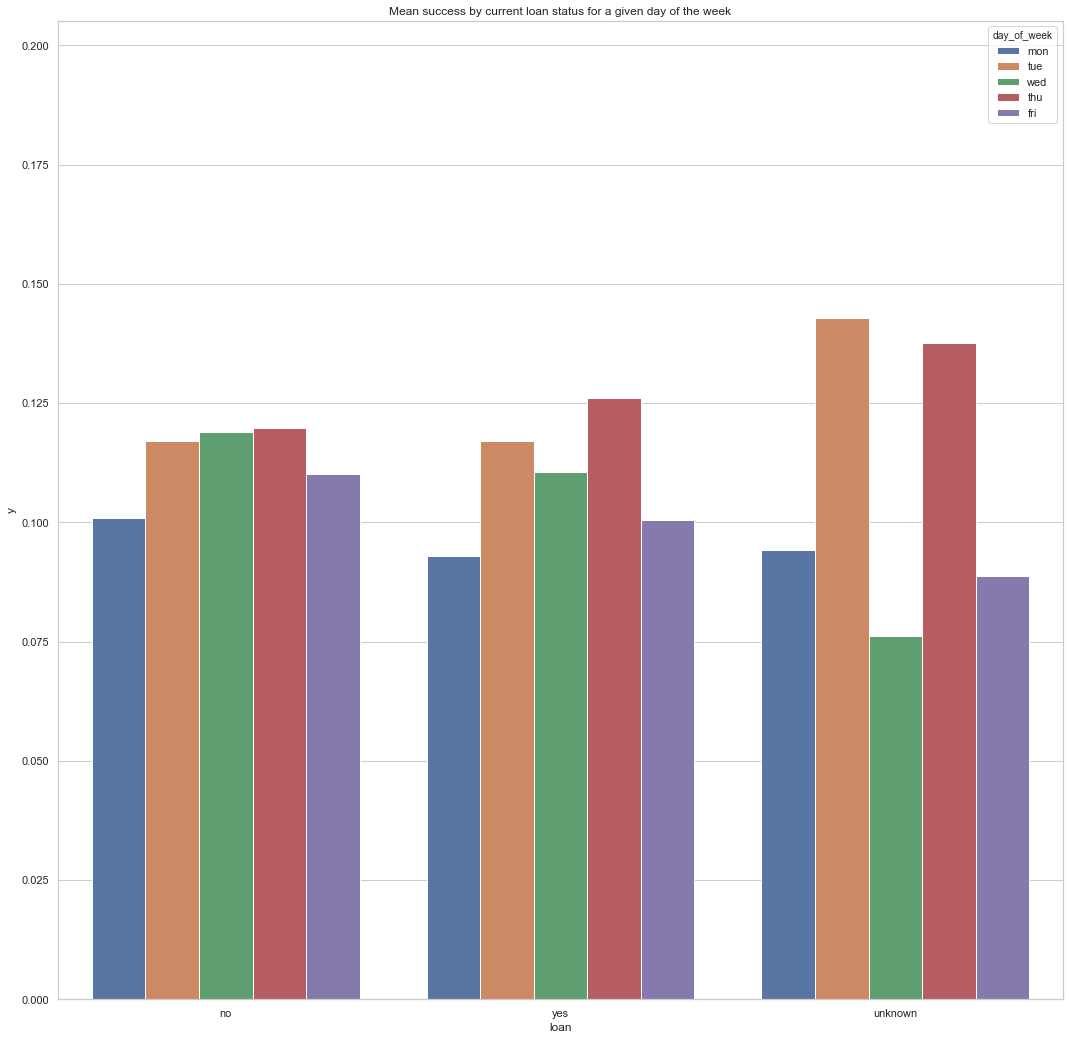

In [24]:
label_encoder = LabelEncoder()
label_encoder.fit(df["y"])
df["y"] = label_encoder.transform(df["y"])

pylab.rcParams['figure.figsize'] = (18, 18)
sns.barplot(x = 'loan', y = 'y', hue = 'day_of_week', data = df, ci=95, errwidth = 0.01)
plt.title('Mean success by current loan status for a given day of the week')
plt.show()

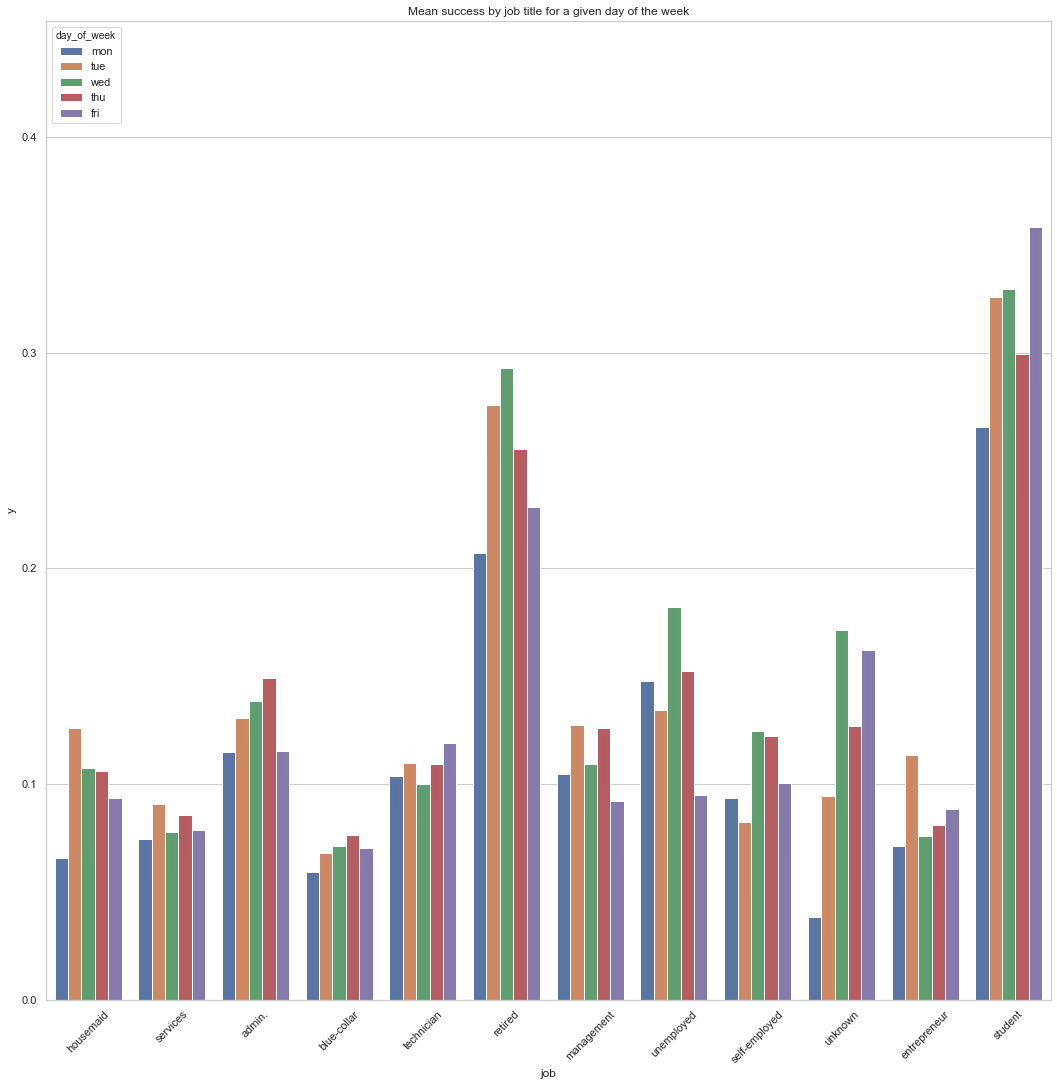

In [25]:
pylab.rcParams['figure.figsize'] = (18, 18)
sns.barplot(x = 'job', y = 'y', hue = 'day_of_week', data = df, ci=95, errwidth = 0.01)
plt.xticks(rotation=45)
plt.title('Mean success by job title for a given day of the week')
plt.show()

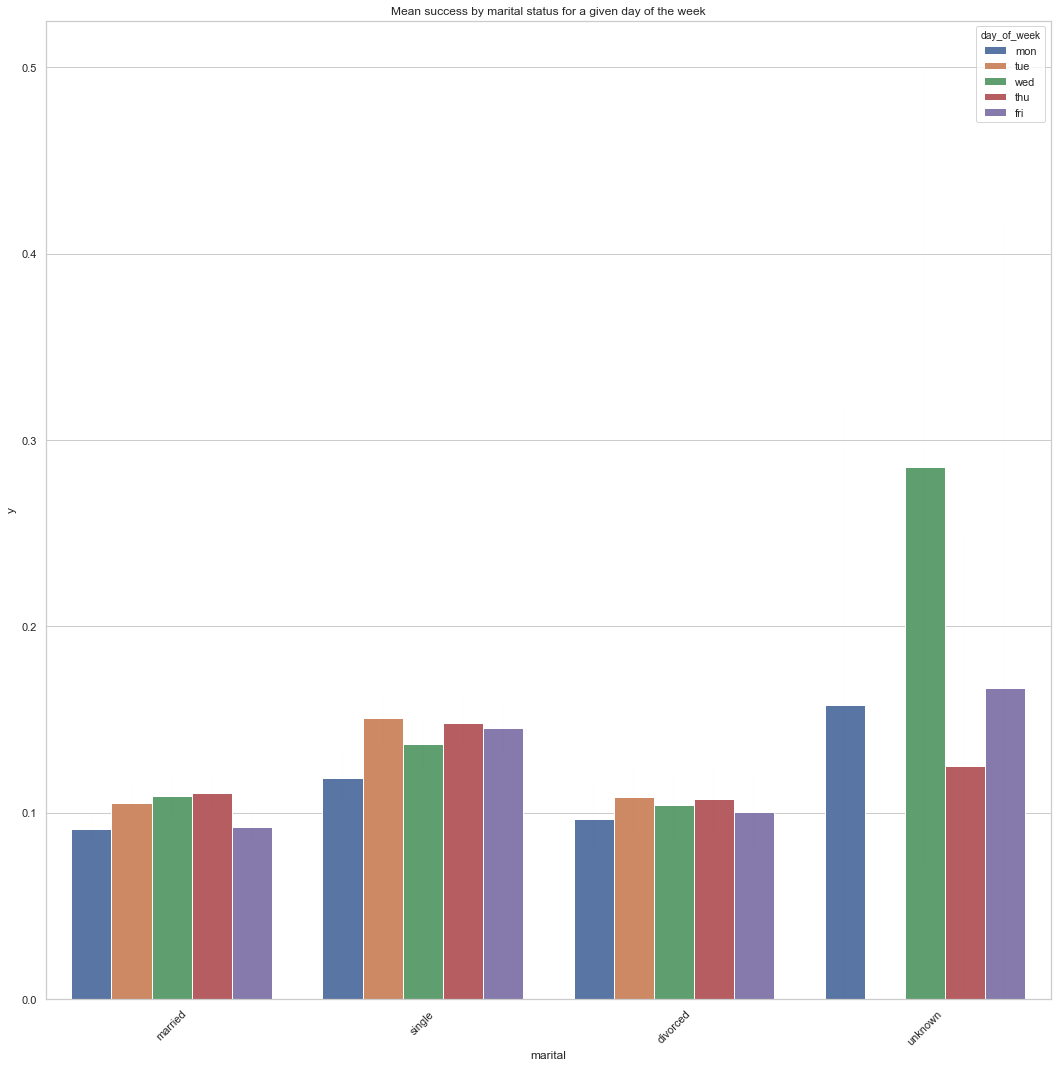

In [26]:
pylab.rcParams['figure.figsize'] = (18, 18)
sns.barplot(x = 'marital', y = 'y', hue = 'day_of_week', data = df, ci=95, errwidth = 0.01)
plt.xticks(rotation=45)
plt.title('Mean success by marital status for a given day of the week')
plt.show()

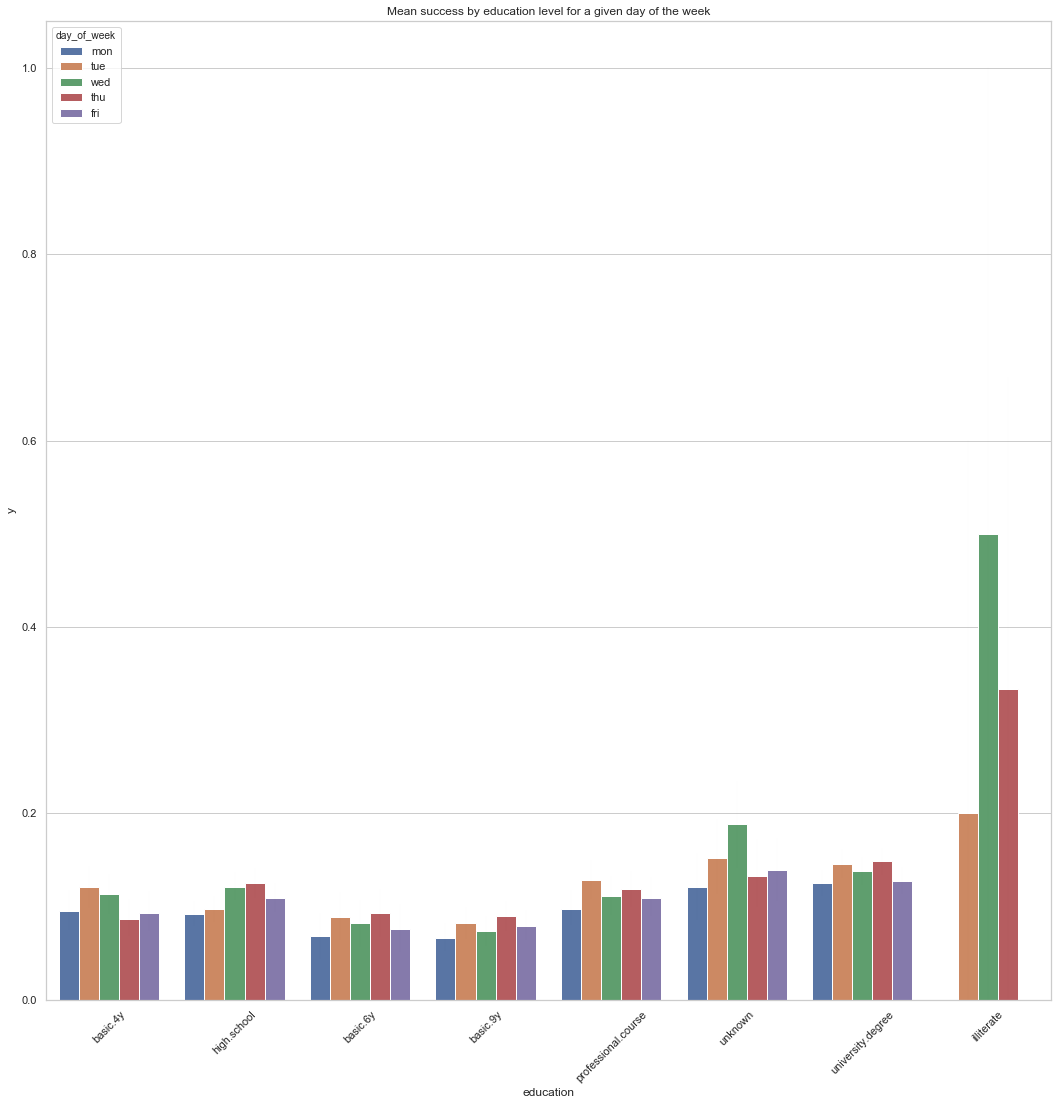

In [27]:
pylab.rcParams['figure.figsize'] = (18, 18)
sns.barplot(x = 'education', y = 'y', hue = 'day_of_week', data = df, ci=95, errwidth = 0.01)
plt.xticks(rotation=45)
plt.title('Mean success by education level for a given day of the week')
plt.show()

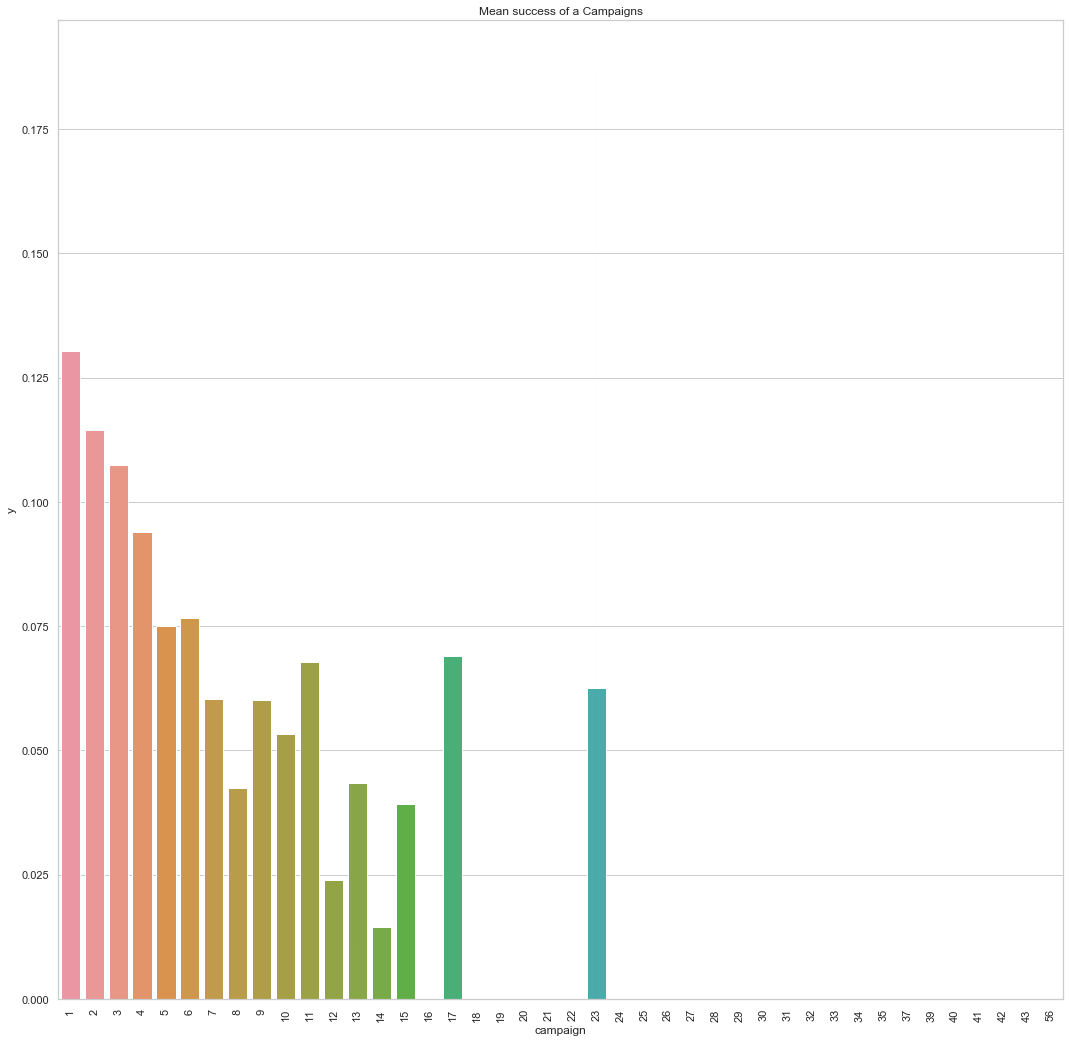

In [28]:
sns.barplot(x="campaign", y="y", data=df, ci=95, errwidth = 0.01)
plt.xticks(rotation=90)
plt.title('Mean success of a Campaigns')
plt.show()

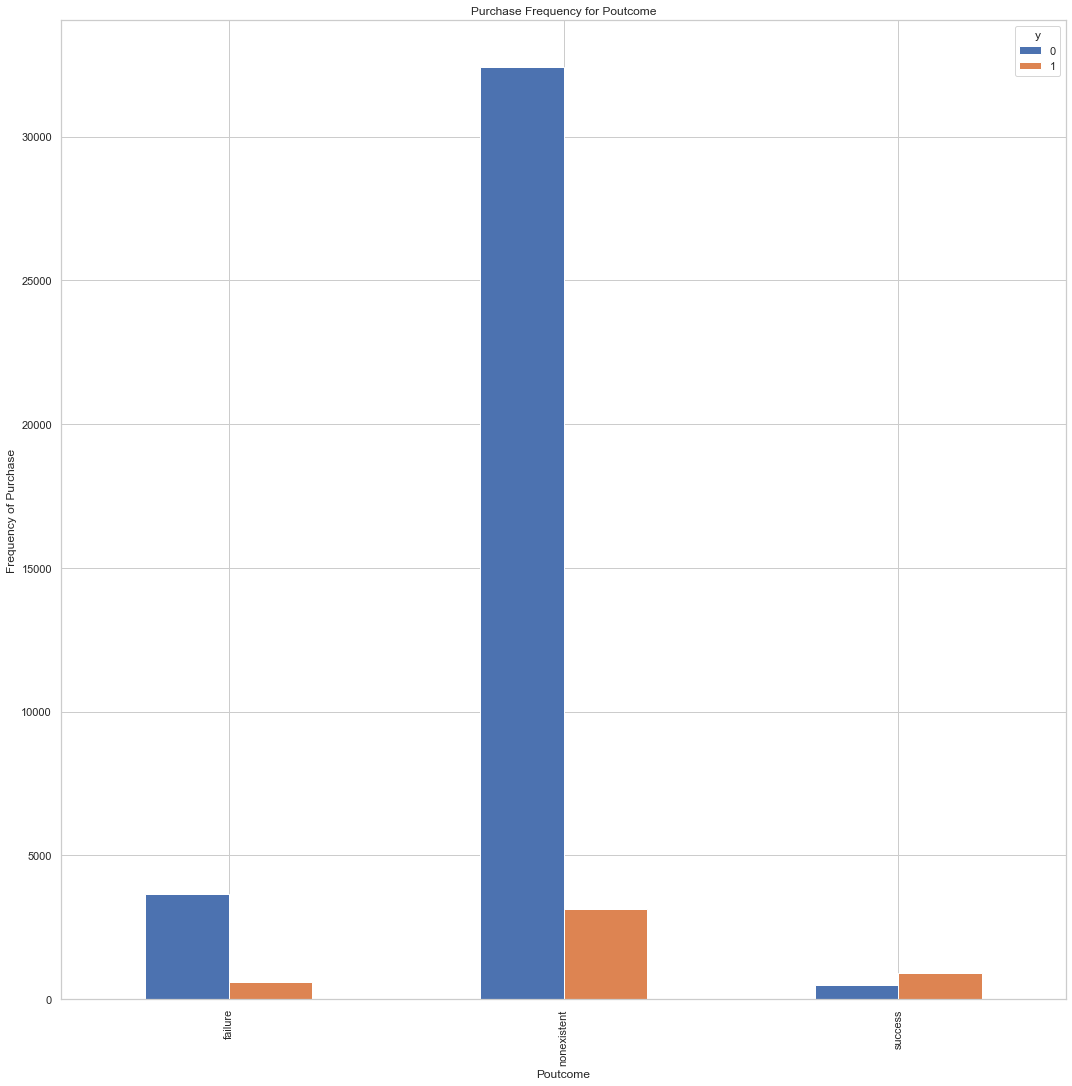

In [29]:
pd.crosstab(df.poutcome, df.y).plot(kind= 'bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.show()

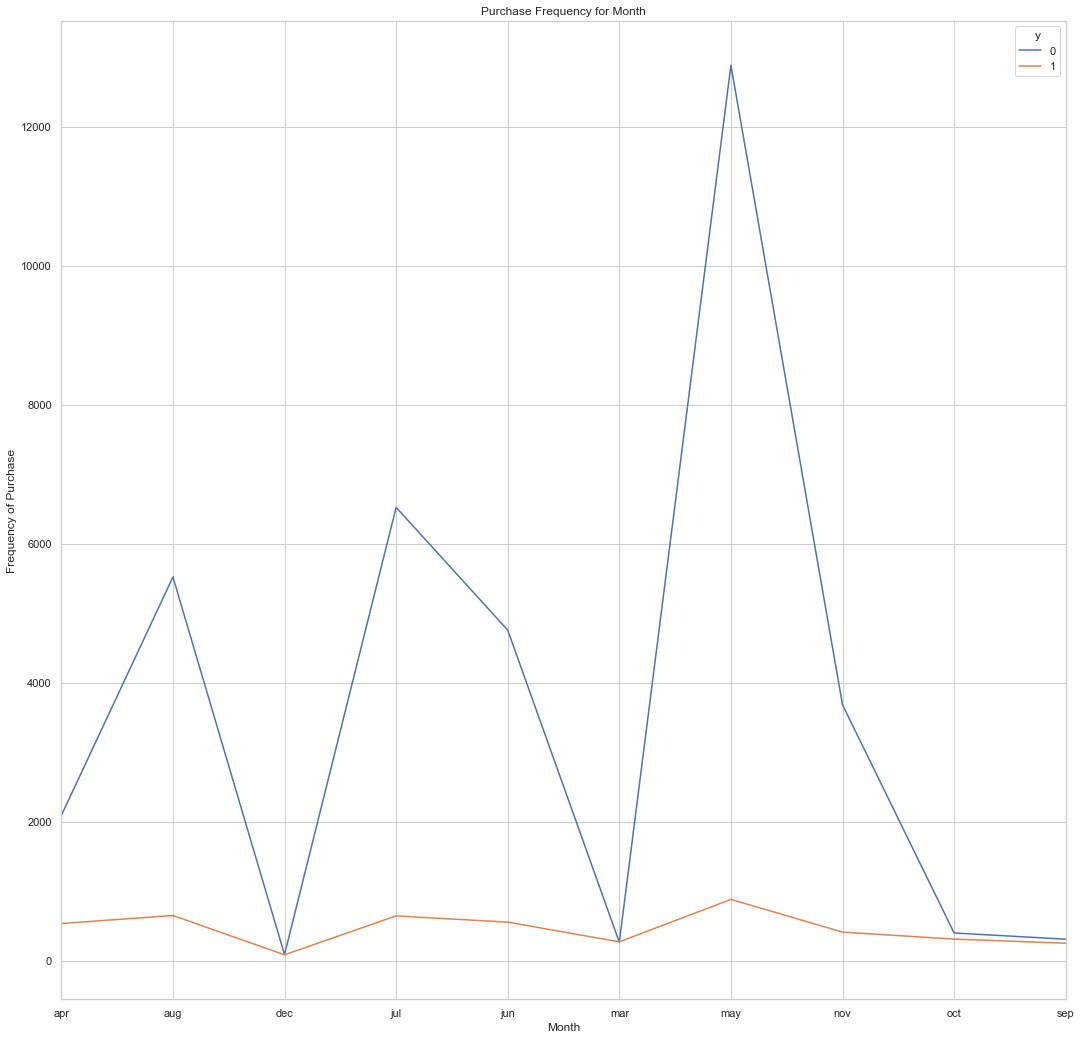

In [30]:
pd.crosstab(df.month, df.y).plot(kind='line')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.show()

In [31]:
df["dur"] = pd.Series(df["duration"] != 0)

In [32]:
#binary attributes label encoding
labels = ['housing', 'default', 'loan']
for label in labels:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[label])
    df[label] = label_encoder.transform(df[label])

In [33]:
cols = ['job', 'contact', 'marital','education', 'poutcome', 'month', 'day_of_week']
for label in cols:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[label])
    df[label] = label_encoder.transform(df[label])

In [34]:
df_corr = df.corr()

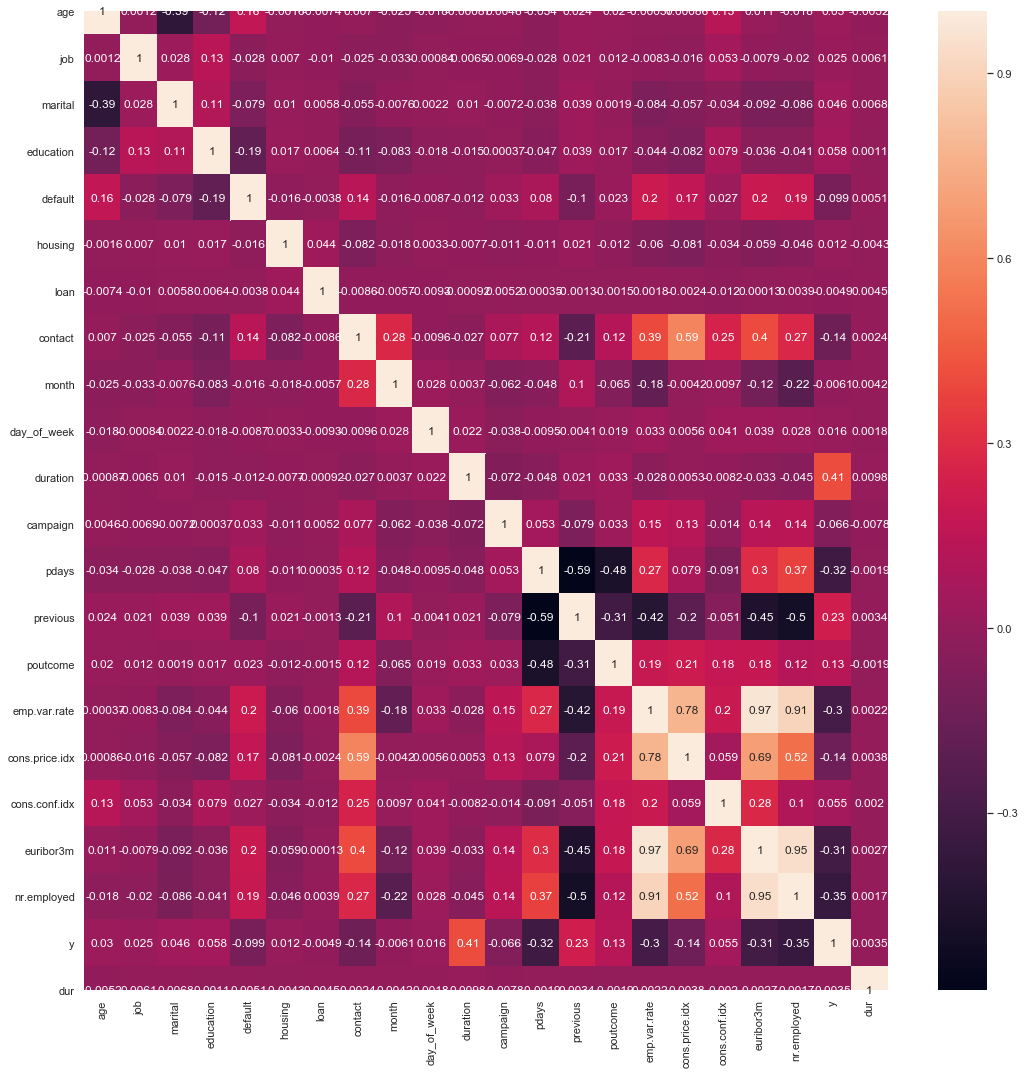

In [35]:
plt.figure(figsize=(18, 18))
sns.heatmap(df_corr, annot = True)
plt.show()

In [36]:
final_df = df.drop(["emp.var.rate", "cons.price.idx", "nr.employed"], axis = 1)

In [37]:
df_corr = final_df.corr()

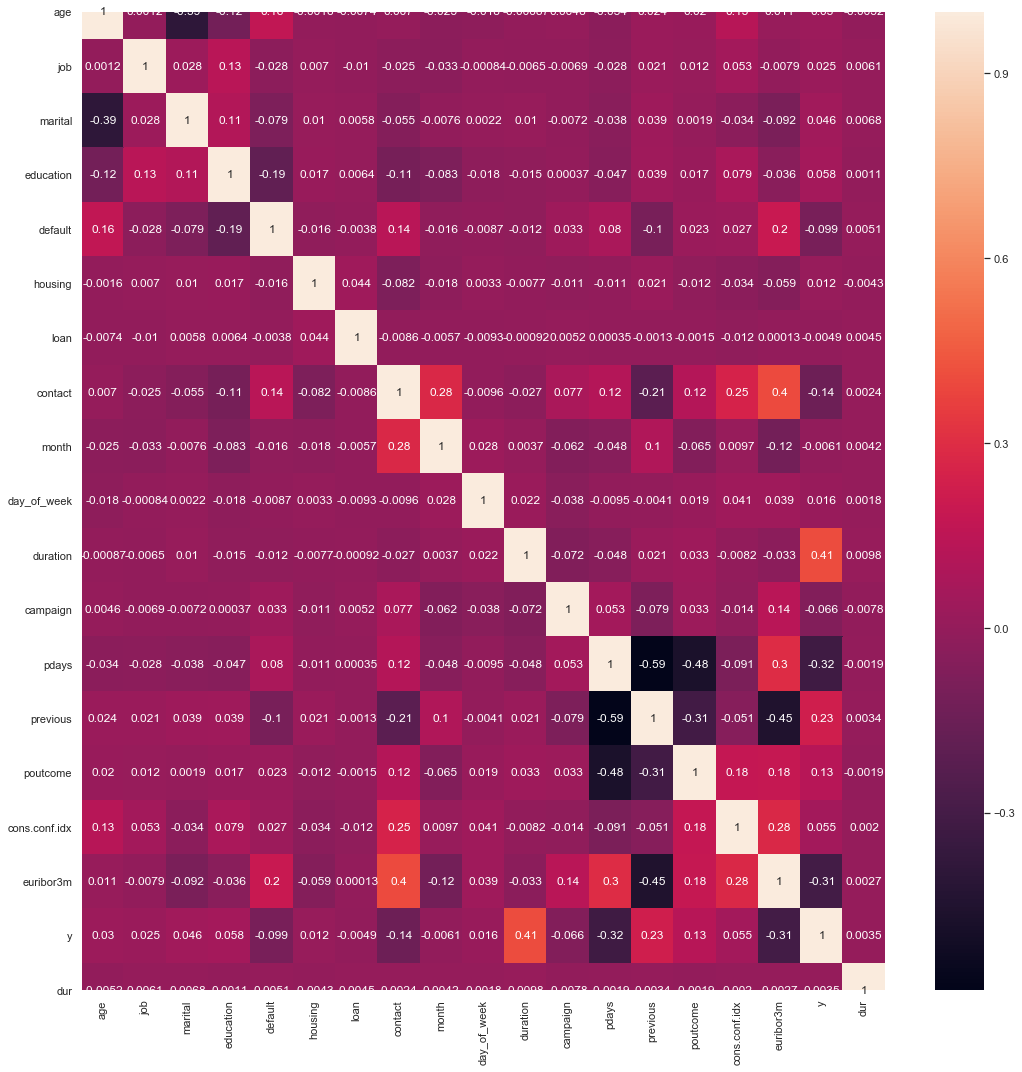

In [38]:
plt.figure(figsize=(18, 18))
sns.heatmap(df_corr, annot = True)
plt.show()

In [39]:
df = pd.get_dummies(final_df, columns = cols)

In [40]:
df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,cons.conf.idx,euribor3m,y,dur,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,contact_0,contact_1,marital_0,marital_1,marital_2,marital_3,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7,poutcome_0,poutcome_1,poutcome_2,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4
0,56,0,0,0,261,1,999,0,-36.4,4.857,0,True,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,57,1,0,0,149,1,999,0,-36.4,4.857,0,True,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,37,0,2,0,226,1,999,0,-36.4,4.857,0,True,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,40,0,0,0,151,1,999,0,-36.4,4.857,0,True,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,56,0,0,2,307,1,999,0,-36.4,4.857,0,True,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
default,41188.0,0.208872,0.406686,0.000,0.000,0.000,0.000,2.000
housing,41188.0,1.071720,0.985314,0.000,0.000,2.000,2.000,2.000
loan,41188.0,0.327425,0.723616,0.000,0.000,0.000,0.000,2.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045


In [42]:
labels = df.y
scaler = MinMaxScaler()
features = pd.DataFrame(scaler.fit_transform(df.drop(['y'], axis = 1)), columns = df.drop(['y'], axis = 1).columns)

In [43]:
features.head()

,age,default,housing,loan,duration,campaign,pdays,previous,cons.conf.idx,euribor3m,dur,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,contact_0,contact_1,marital_0,marital_1,marital_2,marital_3,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7,poutcome_0,poutcome_1,poutcome_2,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4
0,0.481481,0.0,0.0,0.0,0.053070,0.0,1.0,0.0,0.60251,0.957379,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.493827,0.5,0.0,0.0,0.030297,0.0,1.0,0.0,0.60251,0.957379,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.246914,0.0,1.0,0.0,0.045954,0.0,1.0,0.0,0.60251,0.957379,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.283951,0.0,0.0,0.0,0.030704,0.0,1.0,0.0,0.60251,0.957379,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.481481,0.0,0.0,1.0,0.062424,0.0,1.0,0.0,0.60251,0.957379,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1, stratify = labels)

In [48]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)

In [49]:
testing = pd.DataFrame(columns = ["Classifier", "F1-Score", "AUC", "Accuracy"])

In [50]:
params = {
            "criterion" : ["gini", "entropy"], 
            "splitter" : ["best", "random"], 
            "max_depth" : [20, 40, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4],  
        }
clf = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced", presort = True), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=True, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
     

In [51]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'splitter': 'best'}

In [52]:
clf.best_score_

0.5813287427286722

In [54]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

F1-Score on test data is : 0.575
Area under ROC on test data is : 0.815
Accuracy on test data is : 0.878
